## 📊 Flu Vaccine Prediction Project
### 🔍 Business Understanding
Vaccinations play a crucial role in controlling infectious diseases. In the aftermath of the 2009 H1N1 pandemic, understanding the factors influencing vaccination uptake can help inform future public health strategies.

Goal: Predict whether individuals received the H1N1 and/or seasonal flu vaccines using demographic, behavioral, and opinion data.

Business Impact: This model can help public health officials identify groups less likely to vaccinate and design targeted awareness or intervention campaigns.

#### 📝 Problem Statement
Influenza (flu) poses a significant threat to public health, with the H1N1 pandemic of 2009 highlighting the importance of vaccination programs. Despite public health efforts, vaccine hesitancy remains a persistent challenge influenced by a variety of demographic, behavioral, and social factors. Accurately predicting an individual’s likelihood of receiving the H1N1 and/or seasonal flu vaccines can help stakeholders such as governments, NGOs, and health practitioners design targeted interventions, allocate resources efficiently, and improve vaccine uptake rates.

This project aims to develop a data-driven model that can predict vaccine uptake behavior using individual-level data. By understanding the key factors driving vaccine decisions, we hope to assist public health campaigns in becoming more effective and inclusive.



#### 🎯 Project Objectives
~Clean and preprocess the data to handle missing values and prepare features for modeling.

~Visualize key trends and correlations to gain insights into vaccine uptake behavior.

~Build and evaluate machine learning models to predict H1N1 and seasonal flu vaccine uptake.

~Identify the most important features influencing vaccine decisions.

~Provide actionable insights to help improve vaccination campaigns and strategies.

### 📦 1. Initial Setup and Data Loading

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier


In [3]:
train_set_features = pd.read_csv('training_set_features.csv')
train_set_labels = pd.read_csv('training_set_labels.csv')
test_set_features = pd.read_csv('test_set_features.csv')
# Concatenate training features and labels for analysis
df = pd.merge(train_set_features, train_set_labels, on='respondent_id')


###  2. Data Exploration and Preprocessing
To explore the dataset for patterns, missing values, and inconsistencies, and to preprocess the data by handling null values, encoding categorical features, and normalizing numerical variables, ensuring the dataset is ready for machine learning modeling.

In [4]:
# Check number of columns and rows
print(df.shape)

# Check data types and missing values
df.info()

# Display basic statistics
df.describe(include='all')

(26707, 38)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  chil

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,24665,25244,26707,26707,26458.000000,26458.000000,13377,13237,26707.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,3,10,3,NaN,NaN,21,23,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",NaN,NaN,fcxhlnwr,xtkaffoo,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18736,13560,4297,11645,NaN,NaN,2468,1778,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,0.886499,0.534583,NaN,NaN,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,0.753422,0.928173,NaN,NaN,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,0.000000,1.000000


This dataset contains responses from 26,707 individuals about their behaviors, opinions, and demographics related to H1N1 (swine flu) and seasonal flu vaccinations. It includes 38 columns—mostly numerical and categorical data—organized around three key areas: preventive actions, personal opinions, and demographic details.

Behavioral features indicate whether respondents took steps like wearing face masks, avoiding gatherings, or washing hands. Opinion-based columns capture their views on vaccine effectiveness, perceived risk, and fear of getting sick from the vaccine. Demographic details cover age, education, race, income, employment, and household structure.

The target variables, h1n1_vaccine and seasonal_vaccine, show whether a person received each vaccine, making the dataset ideal for classification tasks. However, some fields—like health insurance and employment data—have many missing values, which require cleaning before analysis.

Overall, this dataset offers a rich snapshot of public health behavior and perception during a pandemic, making it valuable for predictive modeling and insights into vaccine adoption patterns.

In [5]:
# Display first five rows of the dataset
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [6]:
# Drop columns with over 12,000 missing values
df = df.dropna(thresh=len(df) - 12000, axis=1)

In [7]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing numerical values with mean
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Fill missing categorical values with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [8]:
# Check for any duplicates
df.duplicated().sum()

0

No duplicate data found in the dataset

In [9]:
# Check for columns and rows to confirm some were dropped
print(df.shape)

# Check to confirm no null values
df.info()

(26707, 35)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  chil

### 3. Data Visualization and Feature Analysis
To create informative visualizations to uncover trends, correlations, and significant predictors of vaccine uptake behavior, aiding in the interpretation and communication of key insights from the data.



#### 📊 1. Distribution of Vaccine Hesitancy
This helps in the understanding of class balance in both H1N1 and seasonal vaccine targets.

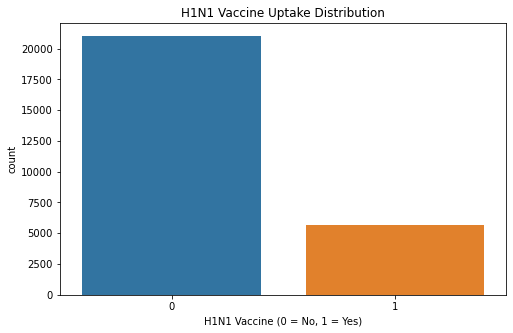

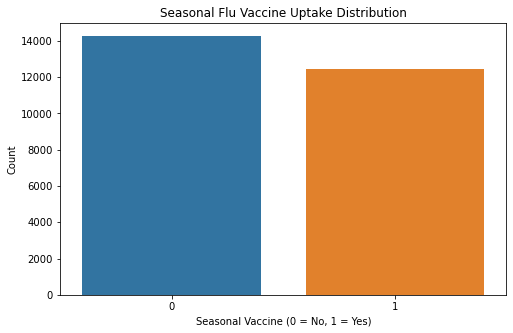

In [26]:
# Countplot of vaccine attitudes
plt.figure(figsize=(8,5))
sns.countplot(x='h1n1_vaccine', data=df)
plt.title('H1N1 Vaccine Uptake Distribution')
plt.xlabel('H1N1 Vaccine (0 = No, 1 = Yes)')



plt.figure(figsize=(8,5))
sns.countplot(x='seasonal_vaccine', data=df)
plt.title('Seasonal Flu Vaccine Uptake Distribution')
plt.xlabel('Seasonal Vaccine (0 = No, 1 = Yes)')
plt.ylabel('Count')

plt.show()



#### 👥 2. Vaccine Uptake by Age Group
 Reveals which age groups are more likely to take each vaccine.

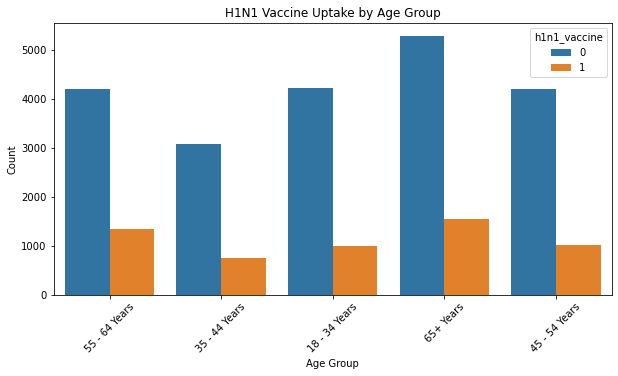

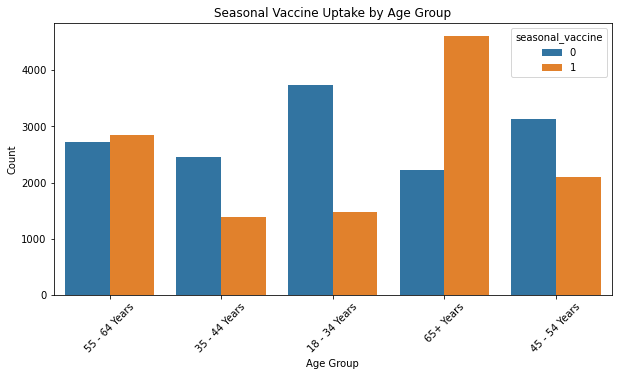

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='age_group', hue='h1n1_vaccine', data=df)
plt.title('H1N1 Vaccine Uptake by Age Group')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='age_group', hue='seasonal_vaccine', data=df)
plt.title('Seasonal Vaccine Uptake by Age Group')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


#### 🧠 3. Health Behavior vs. Vaccine Uptake
 Displays how beliefs in vaccine effectiveness influence decisions to vaccinate.

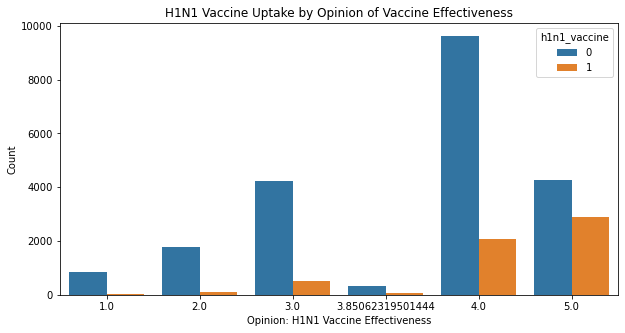

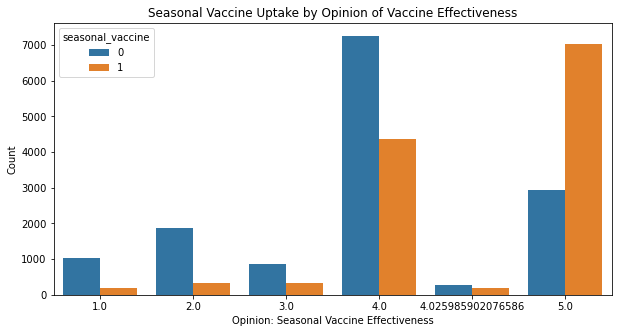

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x='opinion_h1n1_vacc_effective', hue='h1n1_vaccine', data=df)
plt.title('H1N1 Vaccine Uptake by Opinion of Vaccine Effectiveness')
plt.xlabel('Opinion: H1N1 Vaccine Effectiveness')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='opinion_seas_vacc_effective', hue='seasonal_vaccine', data=df)
plt.title('Seasonal Vaccine Uptake by Opinion of Vaccine Effectiveness')
plt.xlabel('Opinion: Seasonal Vaccine Effectiveness')
plt.ylabel('Count')
plt.show()



### 4. Model Development and Evaluation
To build and compare multiple machine learning classification models to predict the likelihood of individuals receiving the H1N1 and seasonal vaccines, and evaluate their performance using metrics such as accuracy, F1-score, and AUC-ROC.

In [13]:
# Compute correlation matrix
correlation = df.corr()

# Show correlations with h1n1_vaccine and seasonal_vaccine
correlation[['h1n1_vaccine', 'seasonal_vaccine']].sort_values(by='h1n1_vaccine', ascending=False)

,h1n1_vaccine,seasonal_vaccine
h1n1_vaccine,1.000000,0.377143
doctor_recc_h1n1,0.384662,0.190631
seasonal_vaccine,0.377143,1.000000
opinion_h1n1_risk,0.320833,0.215083
opinion_h1n1_vacc_effective,0.267491,0.203601
opinion_seas_risk,0.256192,0.386410
doctor_recc_seasonal,0.204946,0.354363
opinion_seas_vacc_effective,0.177786,0.358802
health_worker,0.167490,0.125423
h1n1_concern,0.121747,0.154561


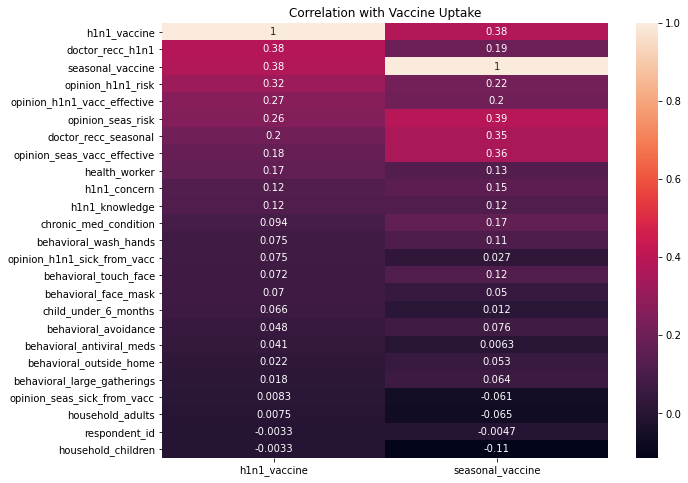

In [14]:
# Compute correlation matrix for numerical columns
correlation = df.corr()

# Plot heatmap of correlation with target vaccine columns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation[['h1n1_vaccine', 'seasonal_vaccine']].sort_values(by='h1n1_vaccine', ascending=False), annot=True)
plt.title('Correlation with Vaccine Uptake')
plt.show()

In [15]:
# Drop respondent_id since it is not needed
X = df.drop(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = df[['h1n1_vaccine', 'seasonal_vaccine']]

# Encode categorical variables
X_encoded = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##### Logistic Regression

In [16]:
# Separate targets
y_train_h1n1 = y_train['h1n1_vaccine']
y_train_seasonal = y_train['seasonal_vaccine']
y_test_h1n1 = y_test['h1n1_vaccine']
y_test_seasonal = y_test['seasonal_vaccine']

# Model for H1N1 vaccine
log_model_h1n1 = LogisticRegression()
log_model_h1n1.fit(X_train_scaled, y_train_h1n1)
y_pred_h1n1 = log_model_h1n1.predict_proba(X_test_scaled)[:, 1]  # Get probabilities and select only the probabilities of class 1

# Model for Seasonal vaccine
log_model_seasonal = LogisticRegression()
log_model_seasonal.fit(X_train_scaled, y_train_seasonal)
y_pred_seasonal = log_model_seasonal.predict_proba(X_test_scaled)[:, 1]

# AUC scores
auc_h1n1 = roc_auc_score(y_test_h1n1, y_pred_h1n1)#measures how well the model separates positive from negative(1-perfect prediction,0.5-random guessing)
auc_seasonal = roc_auc_score(y_test_seasonal, y_pred_seasonal)
mean_auc = np.mean([auc_h1n1, auc_seasonal])

print(auc_h1n1)
print(auc_seasonal)
print(mean_auc)



0.8258223449226398
0.8515642673890087
0.8386933061558243


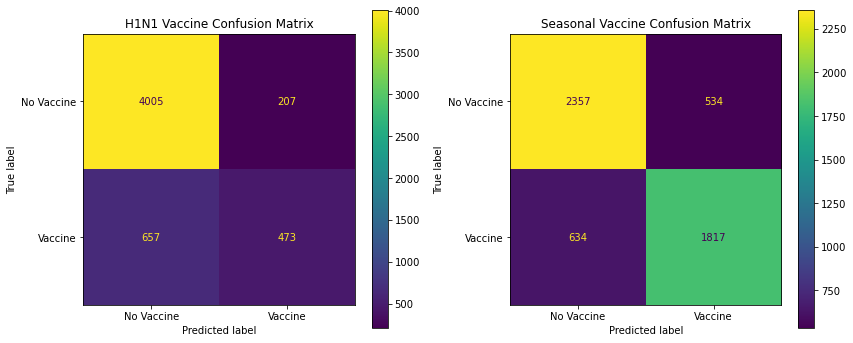

In [17]:
# Binary predictions for confusion matrix
y_pred_h1n1_binary = (y_pred_h1n1 >= 0.5).astype(int)
y_pred_seasonal_binary = (y_pred_seasonal >= 0.5).astype(int)

# Confusion matrices
cm_h1n1 = confusion_matrix(y_test['h1n1_vaccine'], y_pred_h1n1_binary)
cm_seasonal = confusion_matrix(y_test['seasonal_vaccine'], y_pred_seasonal_binary)

# Display confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(cm_h1n1, display_labels=["No Vaccine", "Vaccine"]).plot(ax=axs[0])
axs[0].set_title("H1N1 Vaccine Confusion Matrix")
ConfusionMatrixDisplay(cm_seasonal, display_labels=["No Vaccine", "Vaccine"]).plot(ax=axs[1])
axs[1].set_title("Seasonal Vaccine Confusion Matrix")
plt.tight_layout()
plt.show()

##### Confusion Matrix
True Positives (bottom-right): Correctly predicted vaccinated individuals.

True Negatives (top-left): Correctly predicted non-vaccinated individuals.

False Positives (top-right): Predicted vaccinated but actually not.

False Negatives (bottom-left): Predicted not vaccinated but actually are.

Gives a detailed view of prediction errors and helps understand whether the model is biased toward one class.

##### Decision Tree

In [18]:
# Fit individual trees for multilabel task
dt_h1n1 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_seasonal = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_h1n1.fit(X_train_scaled, y_train['h1n1_vaccine'])
dt_seasonal.fit(X_train_scaled, y_train['seasonal_vaccine'])

# Predict probabilities
y_pred_dt_h1n1 = dt_h1n1.predict_proba(X_test_scaled)[:, 1]
y_pred_dt_seasonal = dt_seasonal.predict_proba(X_test_scaled)[:, 1]

# Evaluate AUC
auc_dt_h1n1 = roc_auc_score(y_test['h1n1_vaccine'], y_pred_dt_h1n1)
auc_dt_seasonal = roc_auc_score(y_test['seasonal_vaccine'], y_pred_dt_seasonal)
mean_auc_dt = np.mean([auc_dt_h1n1, auc_dt_seasonal])

print(auc_dt_h1n1)
print(auc_dt_seasonal)
print(mean_auc_dt)


0.8179503987763574
0.8279519678750906
0.822951183325724


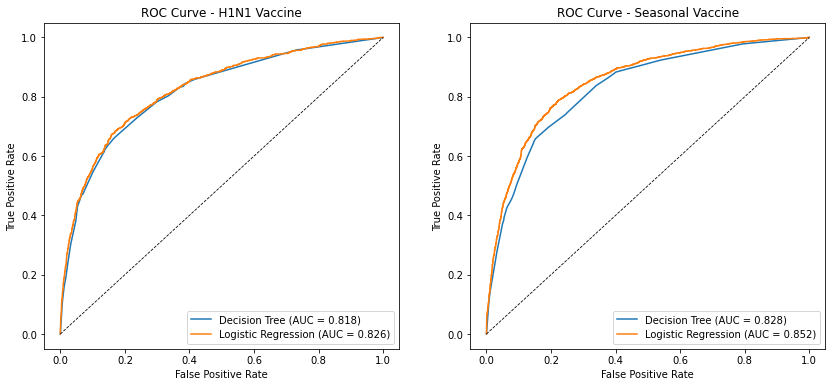

In [23]:
# --- ROC for H1N1 Vaccine ---
fpr_dt_h1n1, tpr_dt_h1n1, _ = roc_curve(y_test_h1n1, y_pred_dt_h1n1)
fpr_log_h1n1, tpr_log_h1n1, _ = roc_curve(y_test_h1n1, y_pred_h1n1)

# --- ROC for Seasonal Vaccine ---
fpr_dt_seasonal, tpr_dt_seasonal, _ = roc_curve(y_test_seasonal, y_pred_dt_seasonal)
fpr_log_seasonal, tpr_log_seasonal, _ = roc_curve(y_test_seasonal, y_pred_seasonal)

# --- Plotting ---
plt.figure(figsize=(14, 6))

# H1N1 Plot
plt.subplot(1, 2, 1)
plt.plot(fpr_dt_h1n1, tpr_dt_h1n1, label=f'Decision Tree (AUC = {auc_dt_h1n1:.3f})')
plt.plot(fpr_log_h1n1, tpr_log_h1n1, label=f'Logistic Regression (AUC = {auc_h1n1:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - H1N1 Vaccine')
plt.legend(loc='lower right')

# Seasonal Plot
plt.subplot(1, 2, 2)
plt.plot(fpr_dt_seasonal, tpr_dt_seasonal, label=f'Decision Tree (AUC = {auc_dt_seasonal:.3f})')
plt.plot(fpr_log_seasonal, tpr_log_seasonal, label=f'Logistic Regression (AUC = {auc_seasonal:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Seasonal Vaccine')
plt.legend(loc='lower right')


plt.show()


Each plot compares the True Positive Rate (TPR) vs the False Positive Rate (FPR) for the two models.

The higher and more left the curve, the better the model is at distinguishing between the classes.

Logistic Regression curves are slightly above those of the Decision Trees, confirming the numerical AUC values.

### 5. Identification of Key Predictive Factors
To identify and rank the most influential features affecting vaccine uptake, such as healthcare access, trust in medical professionals, media exposure, and demographic factors, in order to better understand vaccine hesitancy.

In [20]:
# Use the actual encoded column names
feature_names = X_encoded.columns  # X_encoded is the DataFrame before scaling

# For H1N1
coefs_h1n1 = pd.Series(log_model_h1n1.coef_[0], index=feature_names).sort_values(key=np.abs, ascending=False)
#log_model_h1n1.coef_: Returns the model's learned weights (also called coefficients), one for each feature used during training.

#[0]: Access the first (and only) row, since it's a binary classification problem.

#pd.Series(...): Converts the numpy array into a pandas Series for easier analysis.
# For Seasonal
coefs_seasonal = pd.Series(log_model_seasonal.coef_[0], index=feature_names).sort_values(key=np.abs, ascending=False)
#sort_values(...): Sorts the coefficients so the most influential features (positive or negative) are at the top.

#key=np.abs: Sorts based on magnitude, not sign. So both +0.8 and -0.8 are considered equally strong in influence.
# Display top 10
print("Top features influencing H1N1 vaccine uptake:")
print(coefs_h1n1.head(10))

print("\nTop features influencing Seasonal vaccine uptake:")
print(coefs_seasonal.head(10))


Top features influencing H1N1 vaccine uptake:
doctor_recc_h1n1               0.796806
opinion_h1n1_vacc_effective    0.613753
opinion_h1n1_risk              0.463431
health_worker                  0.257128
doctor_recc_seasonal          -0.234734
opinion_seas_risk              0.219550
age_group_65+ Years            0.131548
behavioral_large_gatherings   -0.107450
opinion_seas_sick_from_vacc   -0.104331
opinion_seas_vacc_effective    0.101341
dtype: float64

Top features influencing Seasonal vaccine uptake:
opinion_seas_risk              0.720363
doctor_recc_seasonal           0.637359
opinion_seas_vacc_effective    0.602260
age_group_65+ Years            0.385888
opinion_seas_sick_from_vacc   -0.265949
health_worker                  0.251924
age_group_18 - 34 Years       -0.243208
age_group_35 - 44 Years       -0.139888
behavioral_touch_face          0.116828
h1n1_knowledge                 0.108721
dtype: float64


The top factors influencing H1N1 vaccine uptake are primarily a doctor's recommendation, belief in the vaccine’s effectiveness, and personal perception of H1N1 risk. Health workers and individuals aged 65+ are also more likely to get vaccinated. However, attending large gatherings and the belief that vaccines cause illness slightly reduce uptake, suggesting that risk perception and misinformation play key roles in vaccine hesitancy.

For the seasonal flu vaccine, the strongest predictors are belief in personal risk of the flu, a doctor’s recommendation, and belief in the vaccine’s effectiveness. Older adults and health workers are more inclined to vaccinate, while younger age groups (18–44) are less likely to do so. Negative beliefs, such as fear of getting sick from the vaccine, lower the likelihood of uptake. Overall, trust in healthcare and perceived vulnerability significantly influence both vaccines' acceptance.

### 6. Deployable Solution and Recommendations
To develop a model that can be integrated into public health systems or campaign planning tools, and to provide actionable insights and recommendations that health agencies can use to enhance vaccination coverage and reduce hesitancy in specific population groups.

To address vaccine hesitancy and improve uptake, a deployable solution based on the developed predictive models—such as logistic regression and decision trees—can be integrated into public health systems or campaign planning platforms. This solution would function as a vaccine uptake prediction tool, using key features like healthcare access, personal beliefs, age, and exposure to medical recommendations to assess an individual’s likelihood to get vaccinated. Such a tool would allow health agencies to segment populations and prioritize outreach toward hesitant or at-risk groups.

Insights from the models reveal that trust in healthcare professionals, especially doctor recommendations, significantly influences vaccine acceptance. Therefore, one actionable recommendation is to empower and encourage healthcare providers to actively recommend vaccines during patient interactions. Additionally, awareness campaigns should highlight the personal and public health risks of not vaccinating, particularly targeting younger adults and individuals who underestimate flu severity or have low trust in vaccines. Tailored messaging and increased visibility of trusted health professionals in the community can enhance the credibility of public health communications.

In conclusion, a predictive tool combined with data-driven strategies enables more efficient and targeted vaccination campaigns. By identifying high-risk or hesitant groups and understanding the key drivers behind their decisions, health agencies can allocate resources more effectively, improve trust through focused outreach, and ultimately boost vaccination rates. This integrated approach supports not only better health outcomes but also fosters stronger, more responsive public health infrastructure.